In [2]:
# import packages

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# import cc data from data dir

df = pd.read_csv('../data/creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [7]:
# transform 'Time' in 'Hour of the day', than drop 'Time'
df['Hour'] = df['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))
df.drop('Time', axis=1, inplace=True)
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1


## Descriptive Plots 

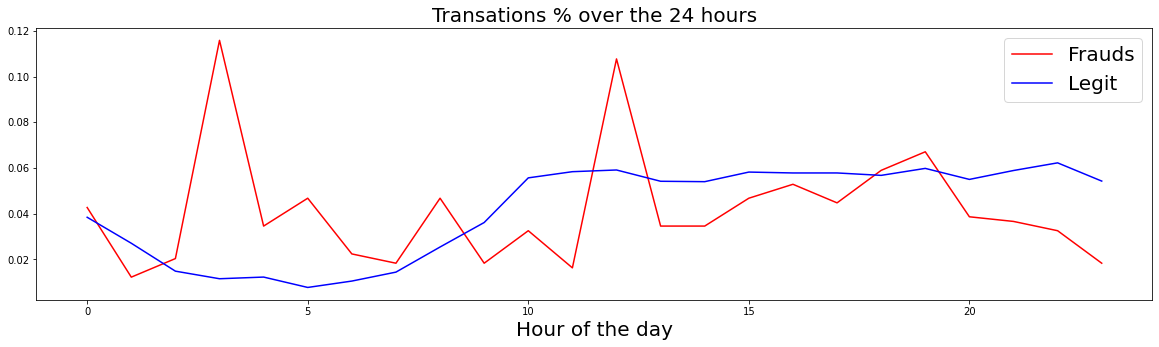

In [8]:
# create pivot table for creating the plot
t_over_time = df.pivot_table(values='Amount',index='Hour',columns='Class',aggfunc='count')
# create rel columns
t_over_time['fraud_perc'] =  t_over_time[1]/t_over_time[1].sum()
t_over_time['norm_perc'] =  t_over_time[0]/t_over_time[0].sum()
# del abs columns
t_over_time.drop(0, axis=1, inplace=True)
t_over_time.drop(1, axis=1, inplace=True)

# plot
plt.figure(figsize=(20,5))
plt.title('Transations % over the 24 hours',fontsize=20)
plt.plot(t_over_time.index, t_over_time.fraud_perc, c = 'r', label = 'Frauds')
plt.plot(t_over_time.index, t_over_time.norm_perc, c = 'b', label = 'Legit')
plt.xlabel('Hour of the day',fontsize=20)
plt.legend(fontsize=20)